In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

from myutils import *

from scipy.misc import imresize
from skimage.feature import peak_local_max
from skimage import filters
from skimage import morphology
from skimage import transform
import scipy
from scipy import ndimage

import time
import math
import random
import re
import glob
import seaborn as sns
import csv

# location of data
location = '/media/andrija/DE5C30AF5C308475/Brainhack Montreal 2018/data/'

In [2]:
imfiles = sorted(glob.glob(location+'*.tif'))
len(imfiles)

40

In [3]:
# select image 
n = 2

In [4]:
im = np.array(Image.open(imfiles[n]).convert('L'))
im.shape

(4352, 4608)

<IPython.core.display.Javascript object>


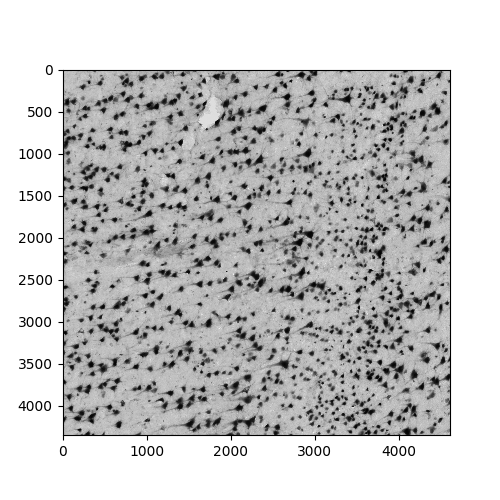

In [5]:
f = plt.figure(figsize=(5,5))
plt.imshow(im, cmap='gray')
plt.show()

In [6]:
my_file_base = imfiles[n].split(".")[0]

# load neuron locations
with open(my_file_base + "_pts.p", "rb") as points_file:
    points_data = points_file.read().split('\r\n')
    points_data = [ (int(x.split()[0]), int(x.split()[1])) for x in points_data if len(x.split())>1 ]

In [7]:
# load components (individual cell areas)
thrld_components = np.load(my_file_base + '_components.npy').item()

In [8]:
nx = im.shape[0] / 2
ny = im.shape[1] / 2
disp = np.zeros(nx*ny)

# Prepare components for display 
# Create an image and populate it with components. Components' brightness reflects their size
for key in thrld_components.keys():
    for p in thrld_components[key]:
        disp[p] = len(thrld_components[key])


<IPython.core.display.Javascript object>


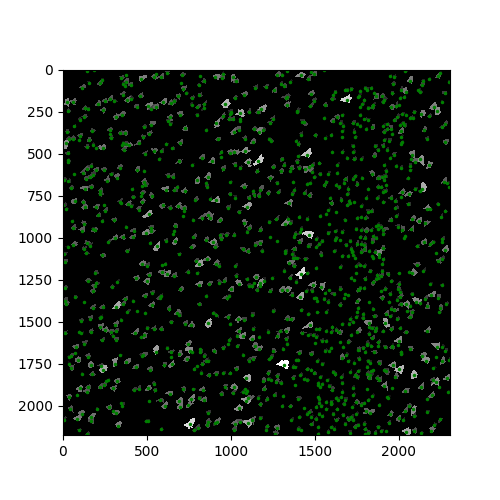

In [9]:
f = plt.figure(figsize=(5,5))
plt.imshow(disp.reshape((nx,ny)), cmap='gray')
plt.plot( [x[1] for x in points_data], [x[0] for x in points_data], 'g.', markersize=3)
plt.show()